## Trend

Trend represents persistent, long-term change in the mean of the series

In [1]:
# Import packages
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from warnings import simplefilter
# Ignore warnings to clean up output cells
simplefilter('ignore')

In [2]:
# Set up matloptlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(12,5))
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
plot_params = dict(color='0.75',style='.-', markeredgecolor='0.25', markerfacecolor='0.25', legend=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Load data
tunnel_df = pd.read_csv("~/Documents/Projects/machine-learning/datasets/tunnel.csv")

In [4]:
# Set date index
tunnel_df = tunnel_df.set_index('Day')
tunnel_df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


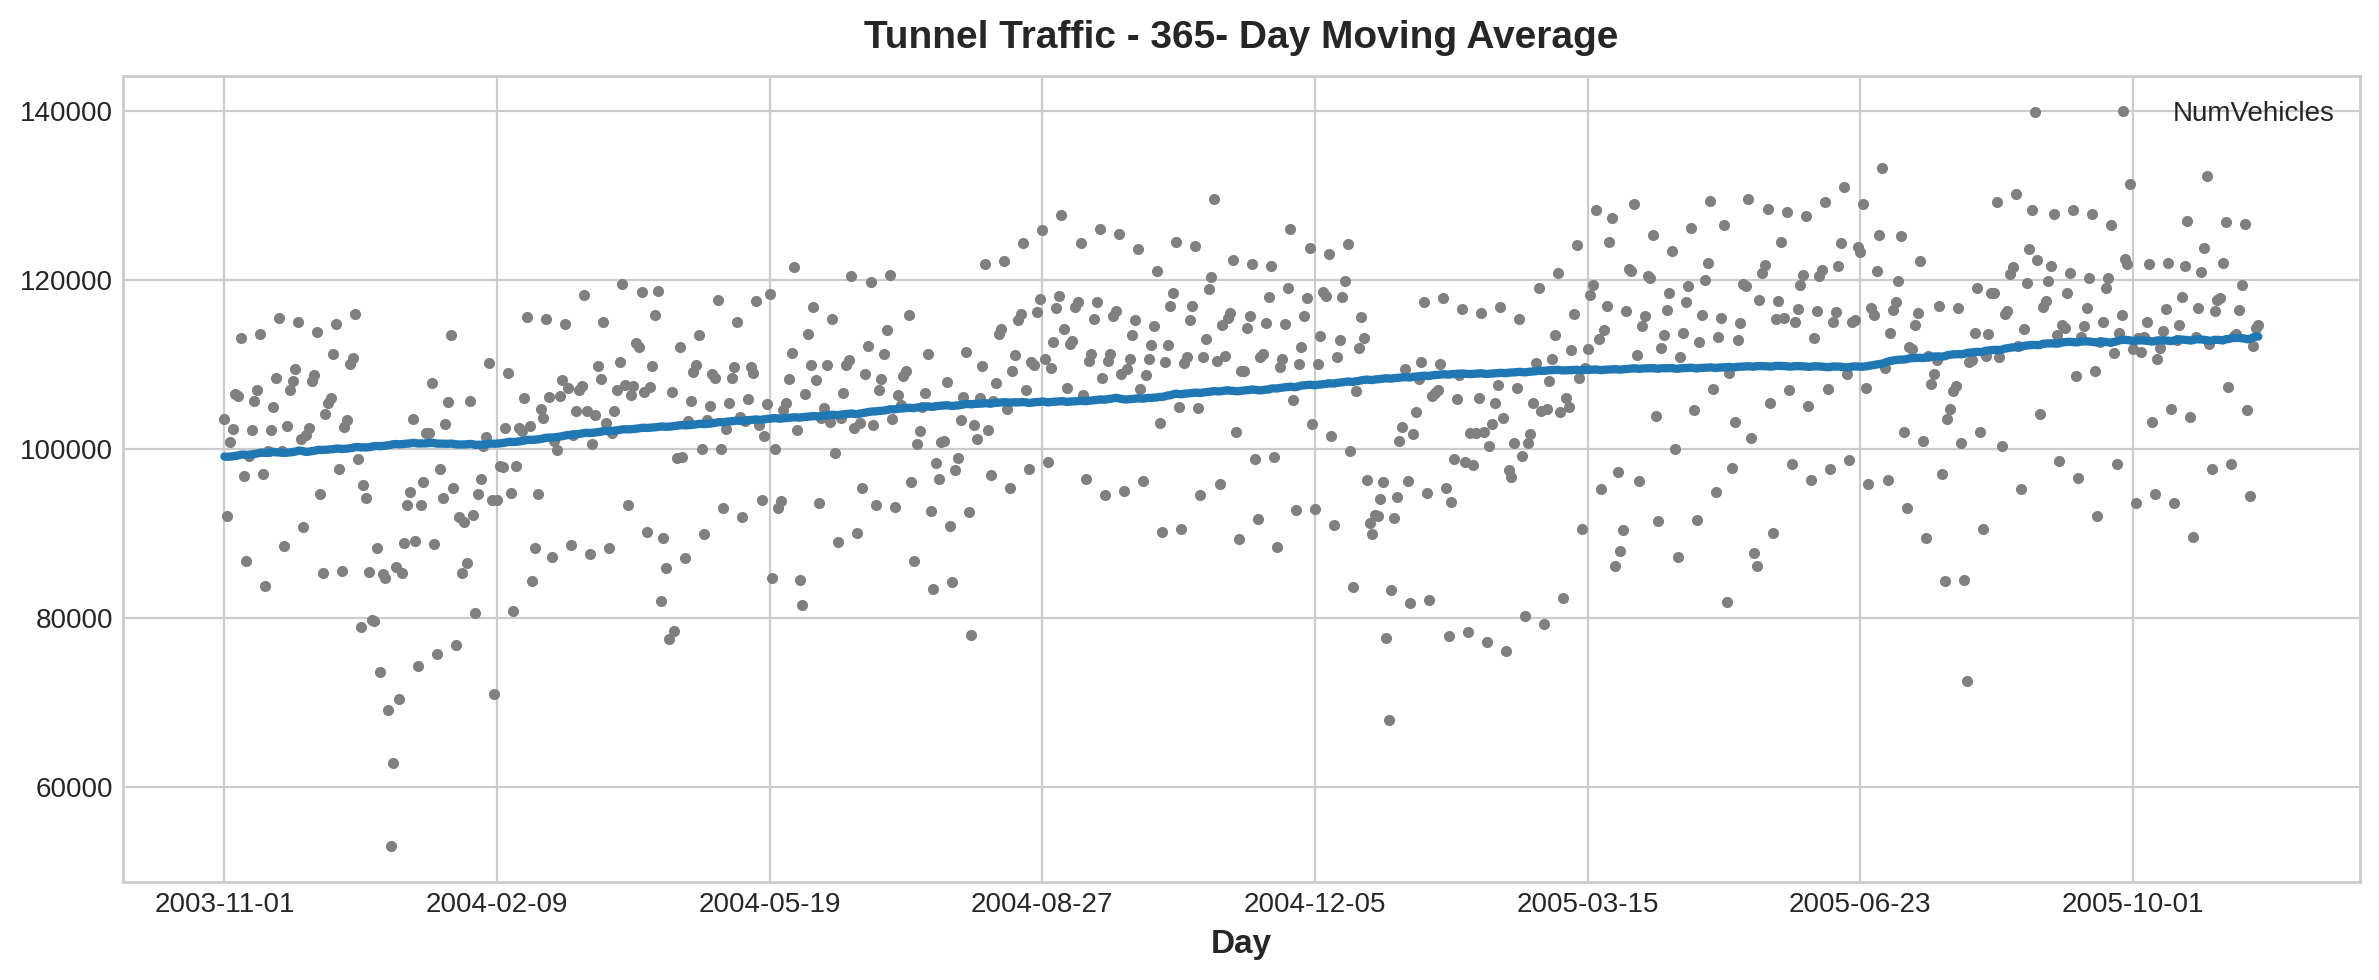

In [5]:
# Moving average plot
moving_avg = tunnel_df.rolling(
    window=365, #365-day window
    center=True, #average at the center of the window
    min_periods=183 #avout half the window size
).mean() #could also be median, std, min, max etc

ax = tunnel_df.plot(style='.', color='0.5')
moving_avg.plot(ax=ax, linewidth=3, title='Tunnel Traffic - 365- Day Moving Average', legend=False,);


In [6]:
# Engineer time dummy
dp = DeterministicProcess(
        index=tunnel_df.index, # dates from the training data
        constant=True,         # dummy feature for bias (y_intercept)
        order=1,               # the time dummy (trend)
        drop=True,             # drop terms if necessary to avoid collinearity
)

In [7]:
# features for the dates given in the 'index' argument
X = dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [8]:
# Trend model
y = tunnel_df['NumVehicles'] # the target


In [9]:
# The intercept is the same as the `const` feature from DeterministicProcess
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

target_pred = pd.Series(model.predict(X), index=X.index)

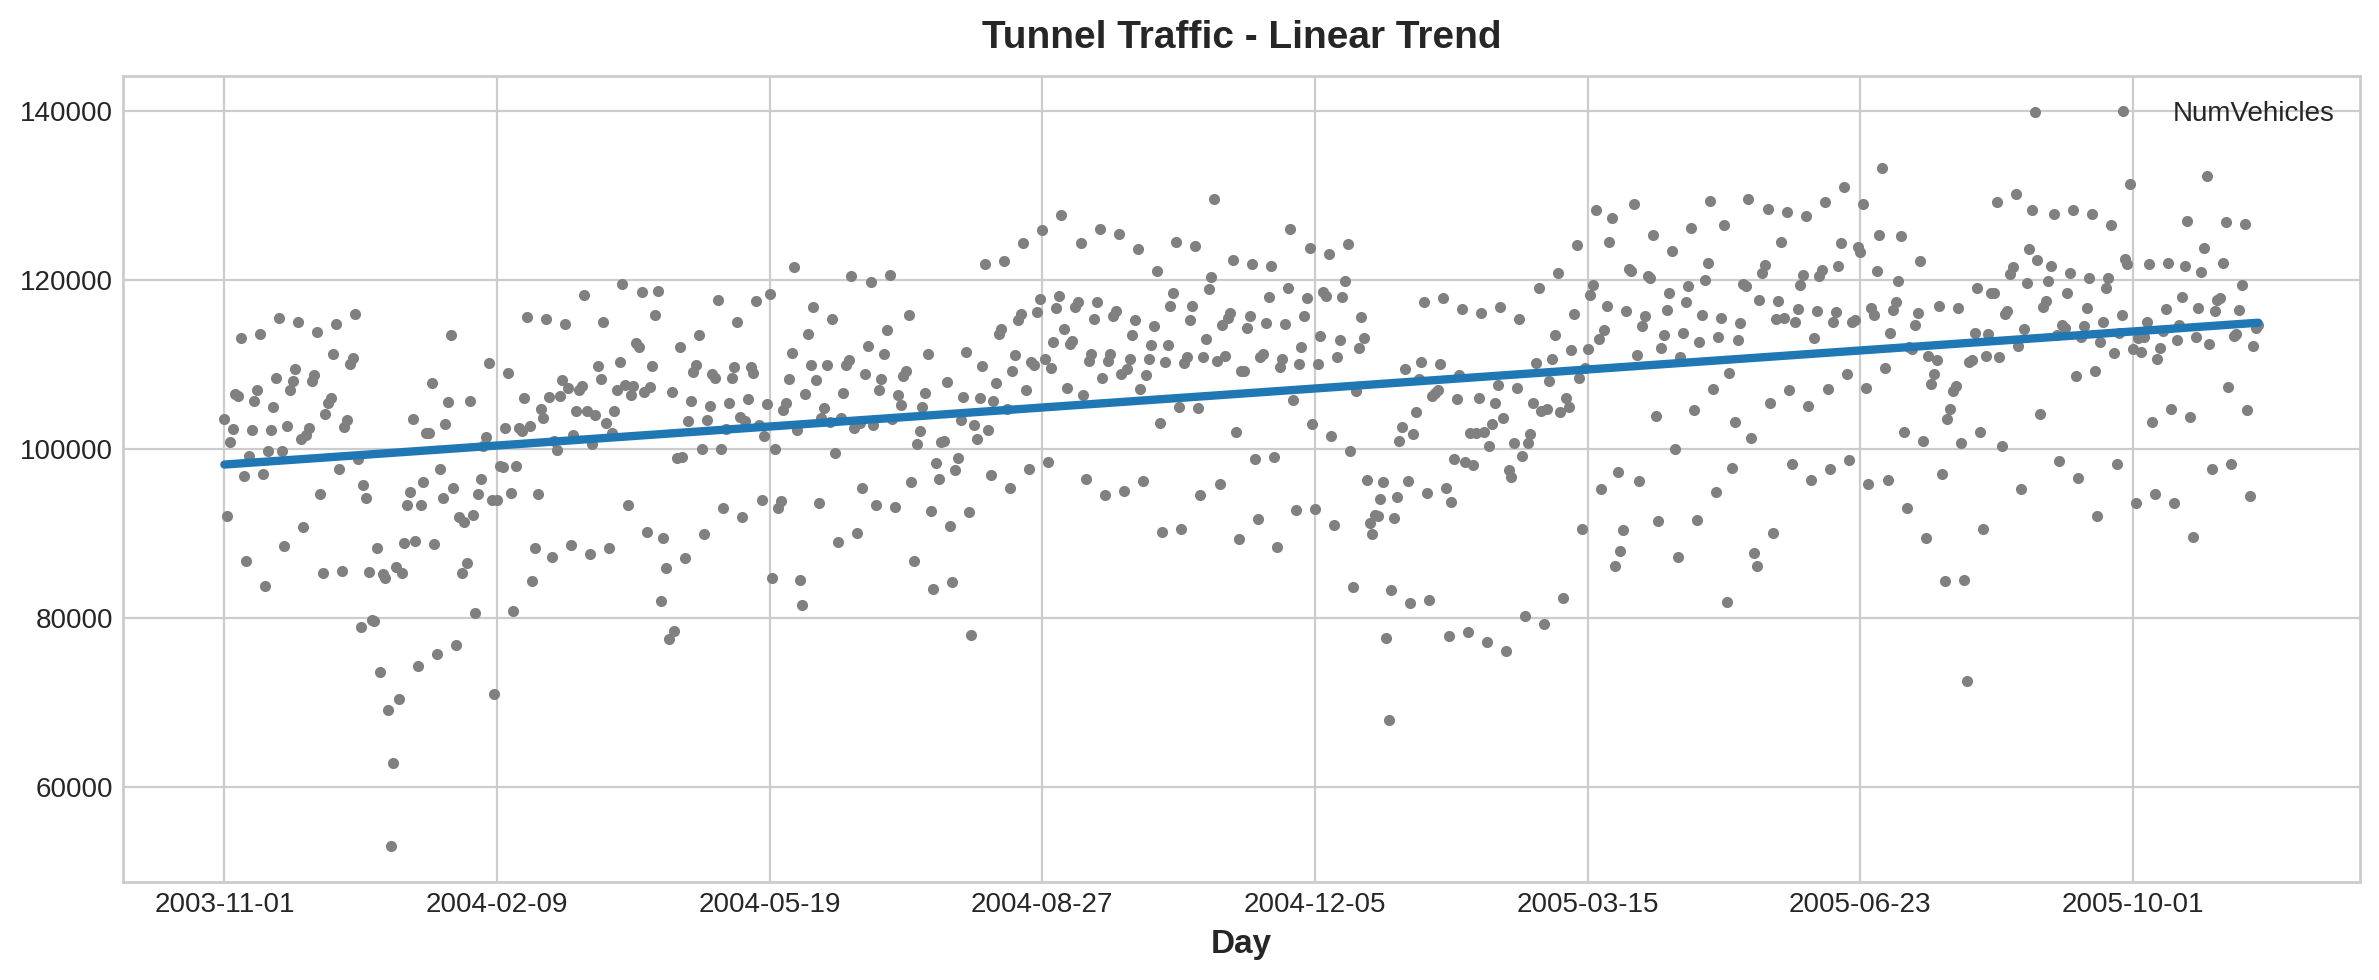

In [10]:
# Plot linear trend
ax = tunnel_df.plot(style='.', color='0.5', title='Tunnel Traffic - Linear Trend')
_ = target_pred.plot(ax=ax, linewidth=3, label='Trend');

In [12]:
# Apply out of sample features to our model
# "Out of sample" refers to times outside observation period
# Engineer time dummy
X= dp.out_of_sample(steps=30)

target_fore = pd.Series(model.predict(X), index=X.index)

target_fore.head()

748    114981.801146
749    115004.298595
750    115026.796045
751    115049.293494
752    115071.790944
dtype: float64

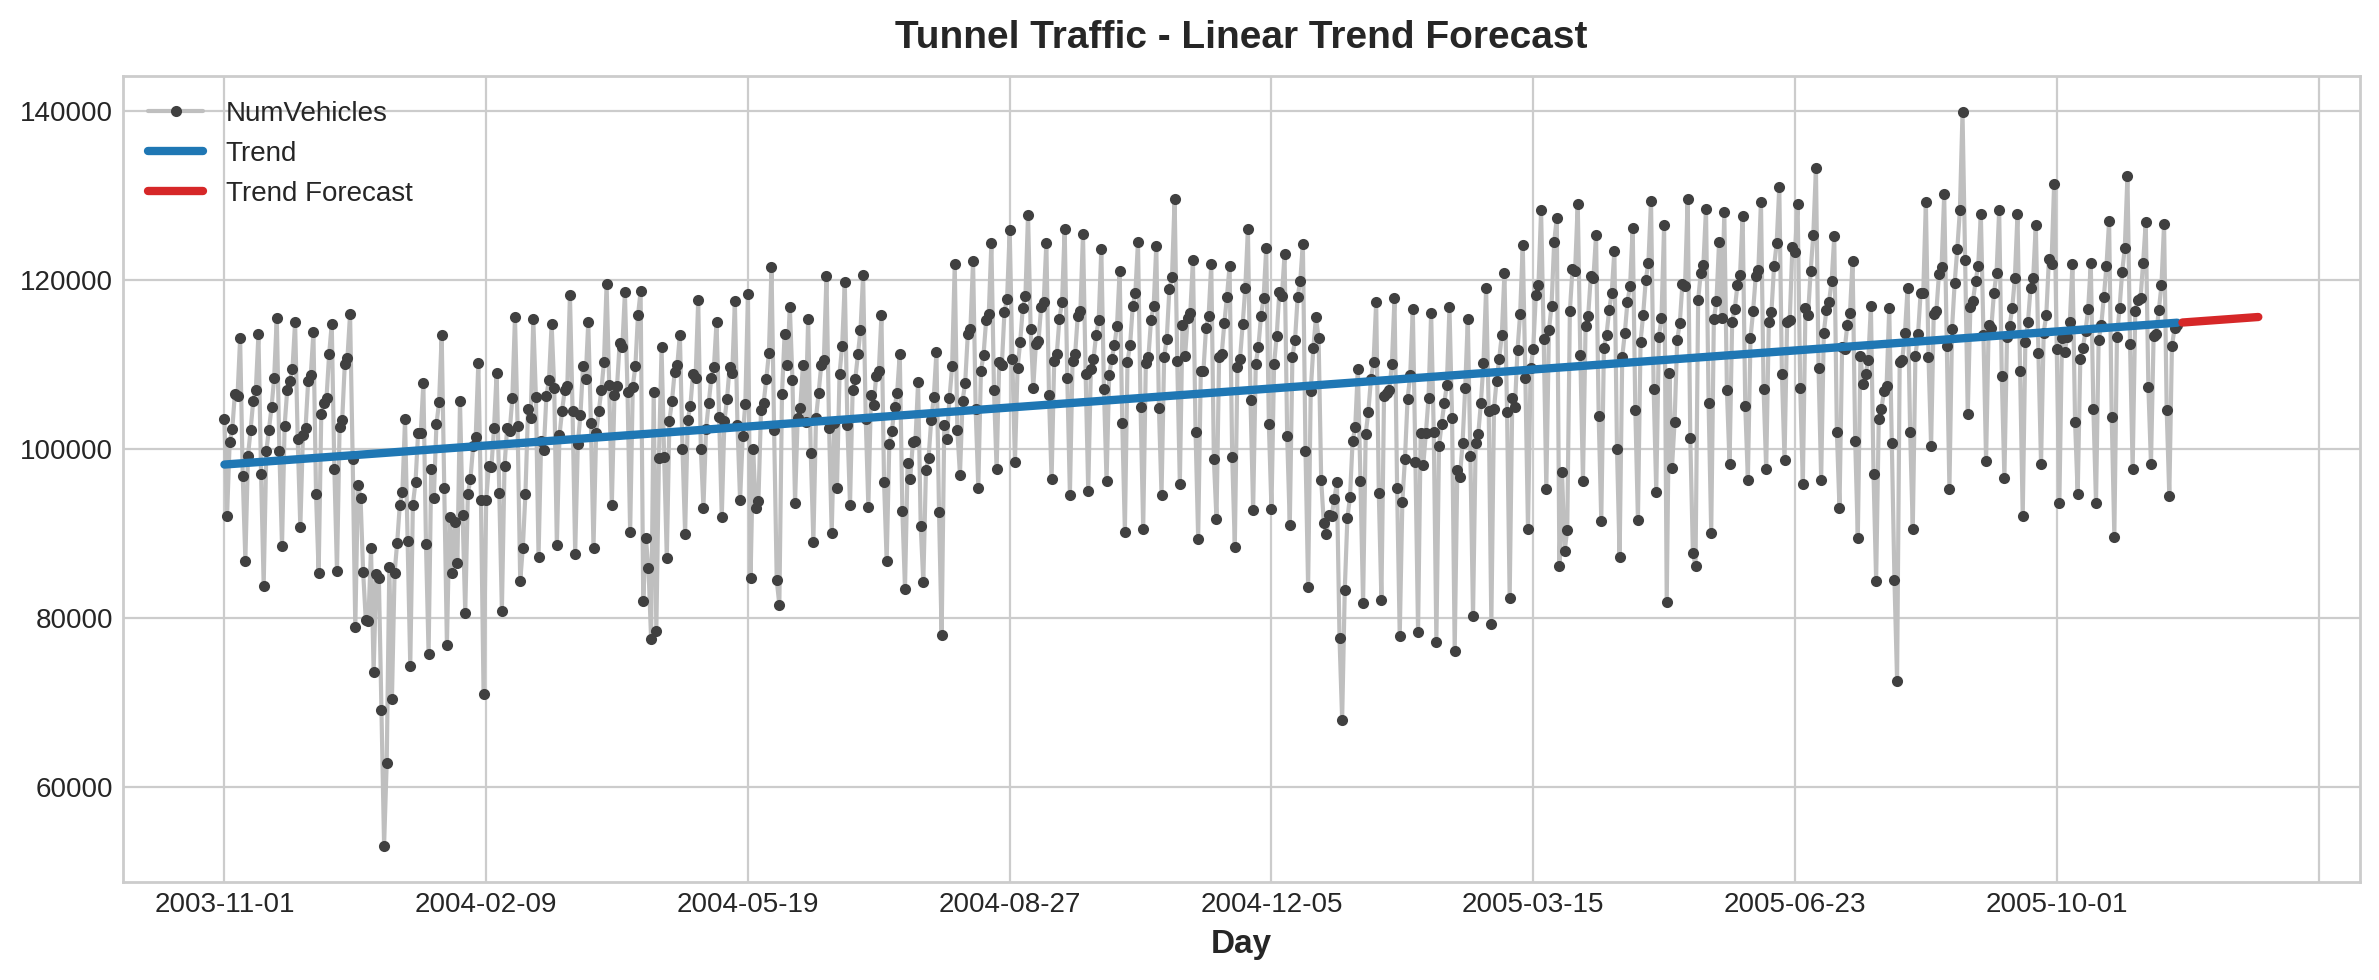

In [20]:
ax = tunnel_df.plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = target_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = target_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()